# Time Series Forecasting Using Facebook Prophet

With time multiple time series analyses and forecasting techniques that have evolved in the market like ARIMA or SARIMA, one can also use deep learning-based methods like LSTM and RNN which are specially designed for performing forecasting and analysis of sequential data.

# Facebook Prophet Library
Prophet is an open-source tool from Facebook used for forecasting time series data which helps businesses understand and possibly predict the market. It is based on a decomposable additive model where non-linear trends fit with seasonality, it also takes into account the effects of holidays. Before we head right into coding, let’s learn certain terms that are required to understand this. 

Here We will install Prophet and Other Dependent Libraries 

In [31]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
%matplotlib inline

WE will Load the csv file in the pandas Data Frame 

In [32]:
df=pd.read_csv(r"C:\Users\santo\Downloads\demand-forecasting-kernels-only\train.csv")

In [33]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


WE have assigned dataset as df above & plot sales graph below

<AxesSubplot:>

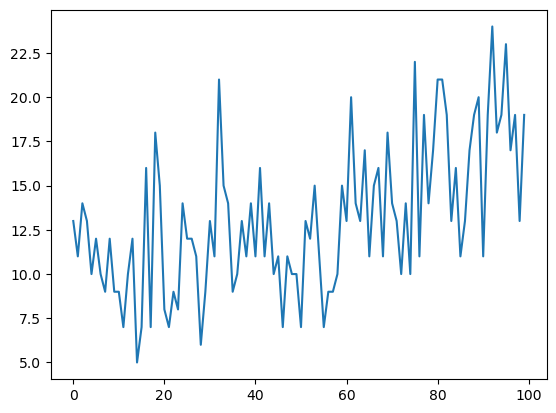

In [34]:
df['sales'].head(100).plot()

Facebook Prophet predicts data only when it is in a certain format. The dataframe with the data should have a column saved as ds for time series data and y for the data to be forecasted. Here, the time series is the column Month and the data to be forecasted is the column 

In [35]:
df1=df.rename(columns={'date':'ds','sales':'y'})
# df1.set_index('ds', inplace=True)
df1=df1[['ds','y']]
df1.head(10000)

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
9995,2015-05-16,15
9996,2015-05-17,24
9997,2015-05-18,13
9998,2015-05-19,17


By using Prophet function we can initialize an instance of the fbprophet model for training of our dataset then it will help to perform time series forecasting

In [36]:
m = Prophet()
m.fit(df1.head(10000))

11:51:54 - cmdstanpy - INFO - Chain [1] start processing
11:51:56 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

We want our model to predict the next one year, The frequency of our data is  So we need to add 60 to more rows of monthly data to a dataframe.

In [51]:
future = m.make_future_dataframe(periods=365)

In [52]:
future.tail()

,ds
2186,2018-12-27
2187,2018-12-28
2188,2018-12-29
2189,2018-12-30
2190,2018-12-31


Now in the future dataframe we have just ds values and we should predict the y values.

In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper', 'trend','trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
2186,2018-12-27,20.828954,12.679323,29.099933,27.125653,26.528042,27.764166
2187,2018-12-28,22.351517,14.177236,30.102018,27.128632,26.527735,27.769483
2188,2018-12-29,23.874607,15.402162,31.416824,27.131611,26.528082,27.774799
2189,2018-12-30,24.888190,17.003562,33.079927,27.134590,26.527390,27.780116
2190,2018-12-31,16.631774,8.722028,24.604408,27.137568,26.527247,27.785283


In [54]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,18.151158,2.122073,18.183194,18.151158,18.151158,-7.865949,-7.865949,-7.865949,-1.768933,-1.768933,-1.768933,-6.097016,-6.097016,-6.097016,0.0,0.0,0.0,10.285209
1,2013-01-02,18.147431,1.898091,18.033695,18.147431,18.147431,-7.674581,-7.674581,-7.674581,-1.546971,-1.546971,-1.546971,-6.127609,-6.127609,-6.127609,0.0,0.0,0.0,10.472850
2,2013-01-03,18.143704,3.762764,19.695675,18.143704,18.143704,-6.352262,-6.352262,-6.352262,-0.185582,-0.185582,-0.185582,-6.166681,-6.166681,-6.166681,0.0,0.0,0.0,11.791442
3,2013-01-04,18.139977,5.360688,21.498217,18.139977,18.139977,-4.904732,-4.904732,-4.904732,1.308140,1.308140,1.308140,-6.212871,-6.212871,-6.212871,0.0,0.0,0.0,13.235246
4,2013-01-05,18.136250,6.431817,22.310421,18.136250,18.136250,-3.452292,-3.452292,-3.452292,2.812309,2.812309,2.812309,-6.264601,-6.264601,-6.264601,0.0,0.0,0.0,14.683959


# Plotting the Forecast Data

Table ds, as we know, is the time series data. yhat is the prediction, yhat_lower, and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels). Next up we have a trend that shows the long-term growth, shrink, or stagnancy of the data, trend_lower, and trend_upper is the uncertainty levels.

In [62]:
# prediction=m.predict()

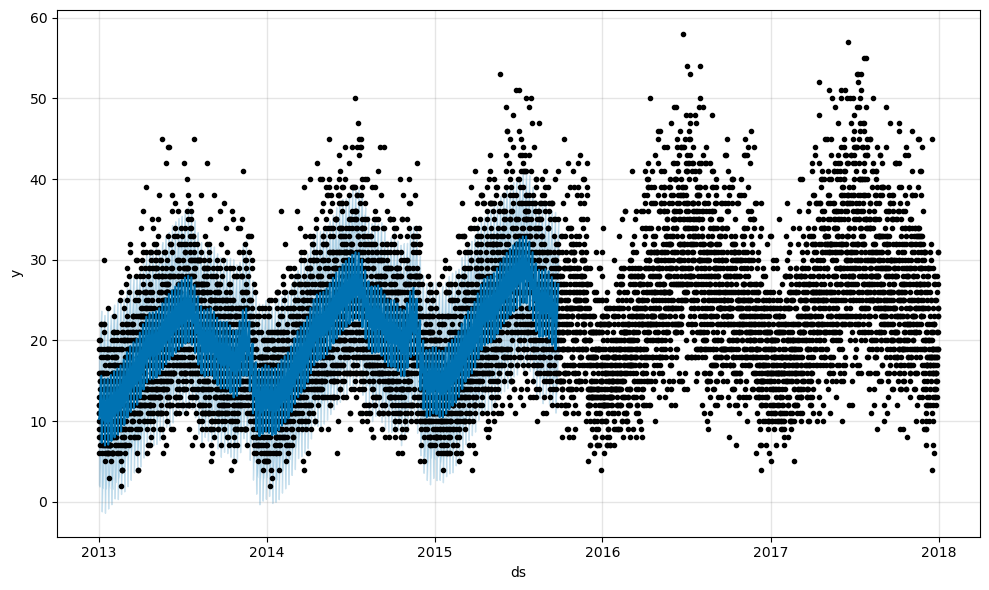

In [66]:
fig1 = m.plot(forecast.head(1000))


The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data.

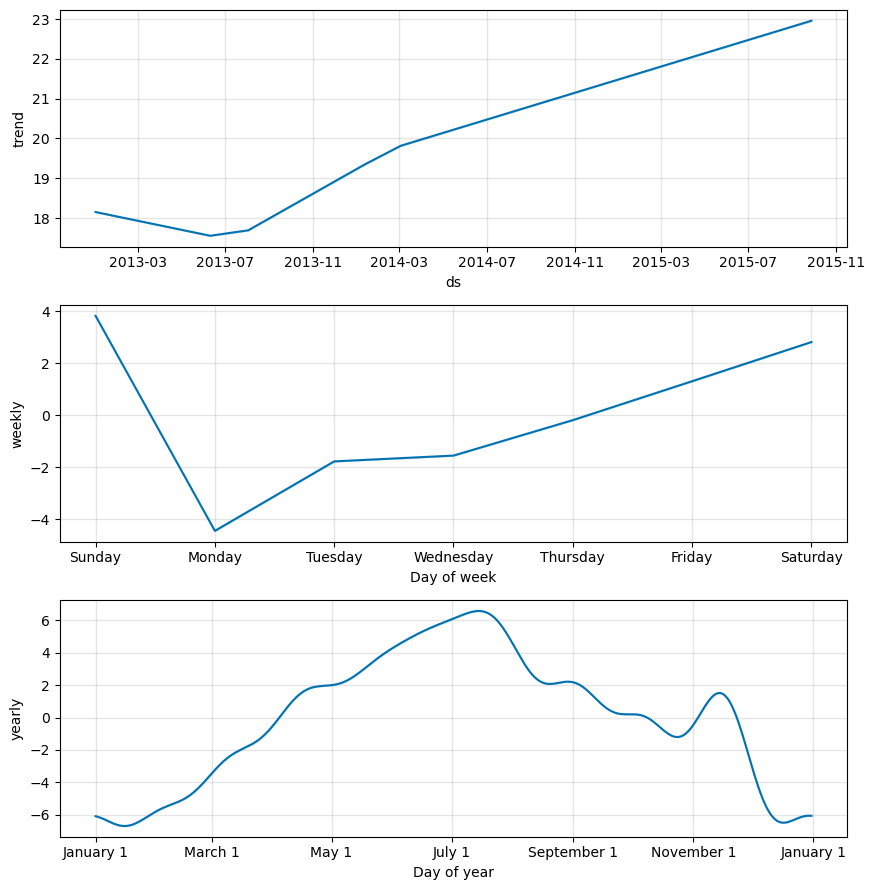

In [56]:
fig2 = m.plot_components(forecast.head(1000))

The below images show the trends and seasonality(in a year) of the time series data. We can see there is an increasing trend, meaning the number of Product Sales has increased over time.

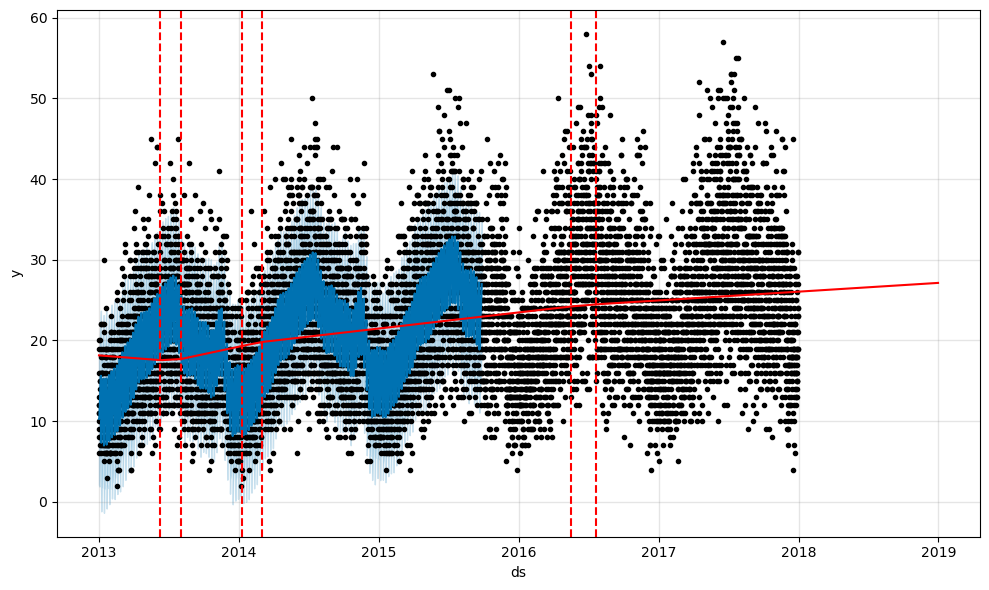

In [67]:
fig = m.plot(forecast.head(1000))
a = add_changepoints_to_plot(fig.gca(),m, forecast)

In [59]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(m,initial='750 days',period='180 days',horizon='365 days')
df_cv.head()

  0%|          | 0/4 [00:00<?, ?it/s]

11:56:51 - cmdstanpy - INFO - Chain [1] start processing
11:56:52 - cmdstanpy - INFO - Chain [1] done processing
11:56:56 - cmdstanpy - INFO - Chain [1] start processing
11:56:58 - cmdstanpy - INFO - Chain [1] done processing
11:57:03 - cmdstanpy - INFO - Chain [1] start processing
11:57:04 - cmdstanpy - INFO - Chain [1] done processing
11:57:07 - cmdstanpy - INFO - Chain [1] start processing
11:57:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-07-11,30.874939,23.086631,38.277658,31,2015-07-10
1,2015-07-11,30.874939,23.268959,38.192221,30,2015-07-10
2,2015-07-11,30.874939,23.591751,37.940645,23,2015-07-10
3,2015-07-11,30.874939,23.391249,37.752159,31,2015-07-10
4,2015-07-11,30.874939,23.109031,38.309300,32,2015-07-10


In [60]:
from prophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,44.071856,6.638664,5.300292,0.271934,0.196925,0.237065,0.750685
1,38 days,44.540099,6.673837,5.343780,0.273791,0.199336,0.239158,0.749315
2,39 days,44.491988,6.670232,5.338374,0.272206,0.200832,0.238376,0.749315
3,40 days,44.080853,6.639341,5.311343,0.271349,0.200832,0.237821,0.751370
4,41 days,43.780540,6.616686,5.310518,0.270938,0.200832,0.237720,0.750685


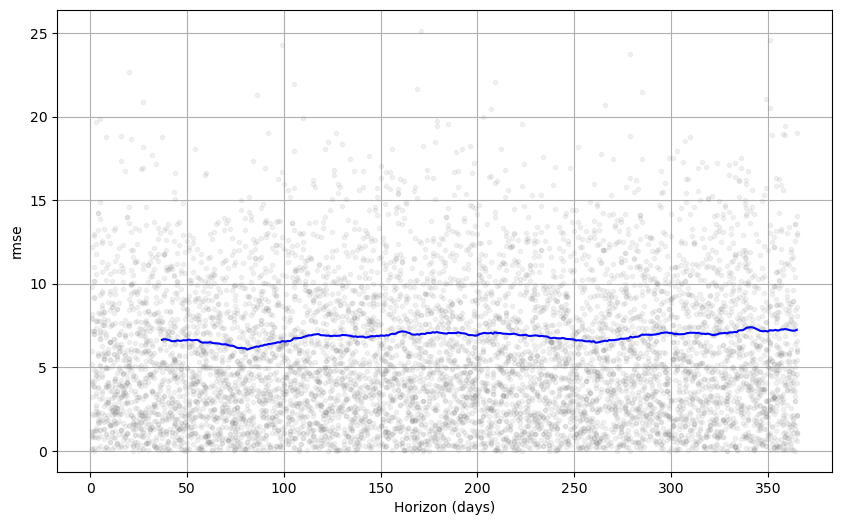

In [61]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')


This is Cross validation(RMSE) graph of Sales Data.